# **Implementation of XOR_ANN with input layer,zero hidden layer and output layer**

In [2]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting
import sys # For printing

In [3]:
# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

num_i_units = 2 # Number of Input units
# num_h_units = 2 # Number of Hidden units
num_h_units = 0 # Number of Hidden units
num_o_units = 1 # Number of Output units
# The learning rate for Gradient Descent.
learning_rate = 0.1
# The parameter to help with overfitting.
reg_param = 0
# Maximum iterations for Gradient Descent.
max_iter = 1000
# Number of training examples
m = 4
np.random.seed(2)
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [4]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

In [5]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea

In [6]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)


In [7]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 1000 and 4

In [8]:
min(cost)

array([0.69314718])

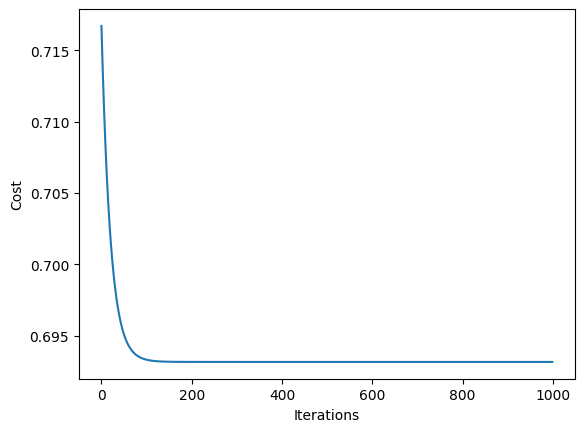

In [9]:
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **Explantion of Above Process-:(Implementation of XOR_ANN with input layer,zero hidden layer and output layer )**
In the above code I simple implemented a Neural Network without hidden layer. As you see from the above graph image the graph line become straight suddenly after few iteration. Interesting this is becasue Neural network without the hidden layer is called a perceptron.
A perceptron is a simple type of neural network that can only perform linear operations. This means that it can only learn linear relationships between the input and output data.
Therefore,in order to solve the more complex problem, you will need to use a neural network with at least one hidden layer. The hidden layer allows the neural network to learn non-linear relationships between the input and output data.

Iteration: 1000 and 4minimum cost value:- [0.69292881]


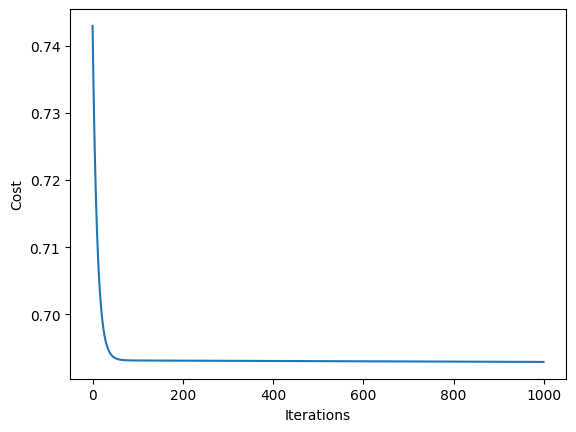

In [10]:
num_h_units = 2 # Number of Hidden units
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 1000
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("minimum cost value:-",min(cost))
plt.plot(range(max_iter), cost)
# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")
# Labelling the y axis as the cost axis.
plt.ylabel("Cost")
# Showing the plot.
plt.show()

## **Adding the hidden layer with two nodes:**
As you cas see from the above figure that after every iteration graph cost value is decreasing beacuse by adding the hidden layer the network start learning the non linear relation as well.

Iteration: 900 and 3

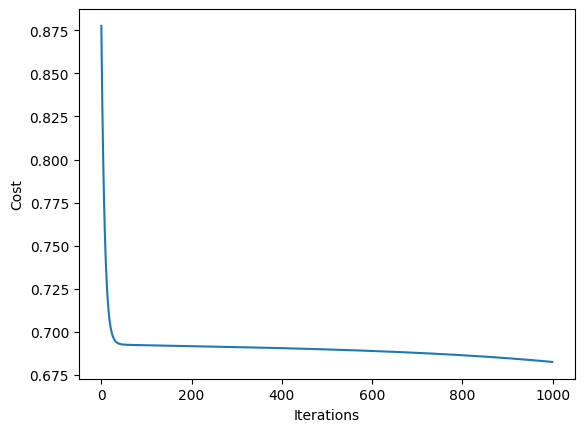

In [11]:
num_h_units = 4 # Number of Hidden units
W1 = np.random.random((num_h_units,num_i_units )) #W1 to W9
W2 = np.random.random((num_o_units,num_h_units)) #W10 to W12

# W1 = np.random.no( (num_h_units, num_i_units)) # 2x2
# W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1
max_iter = 1000
cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after ea
W1, W2, B1, B2 = train(W1, W2, B1, B2)
print("Minimum cost value-:",min(cost))
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

# **Further increasing the Hidden nodes-:**
As you can easily see that increasing the hidden nodes from 2 to 4 has slighty increase the accuracy of a neural network by allowing it to learn more complex relationships between the input and output data.